In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.cluster import KMeans
import glob
from utils import mask_by_range_and_plot

In [2]:
def get_max_crowded_centroid_value(img):
    reshaped_img =img.reshape(img.shape[0] * img.shape[1],img.shape[2])
    kmeans=KMeans(n_clusters=4)
    quantized_img_predicted=kmeans.fit_predict(reshaped_img)

    quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
    quantized_img=np.array(quantized_img).reshape(img.shape[0] , img.shape[1],img.shape[2])

    values,counts=np.unique(quantized_img_predicted, return_counts=True,axis=0)
    return kmeans.cluster_centers_[values[np.argmax(counts)]]

Max bgr skin range [ 86 111 139]
Min bgr skin range [19 17 14]
Max hsv skin range [ 86 111 139]
Min hsv skin range [19 17 14]


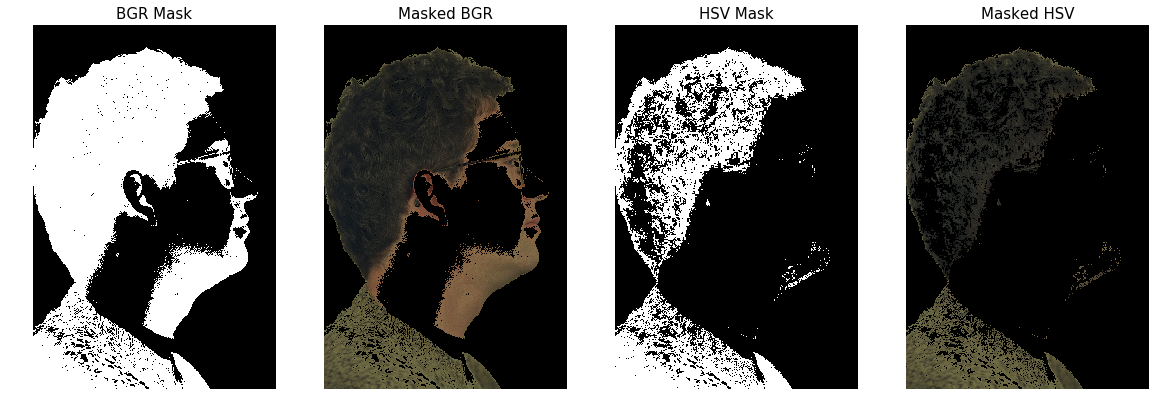

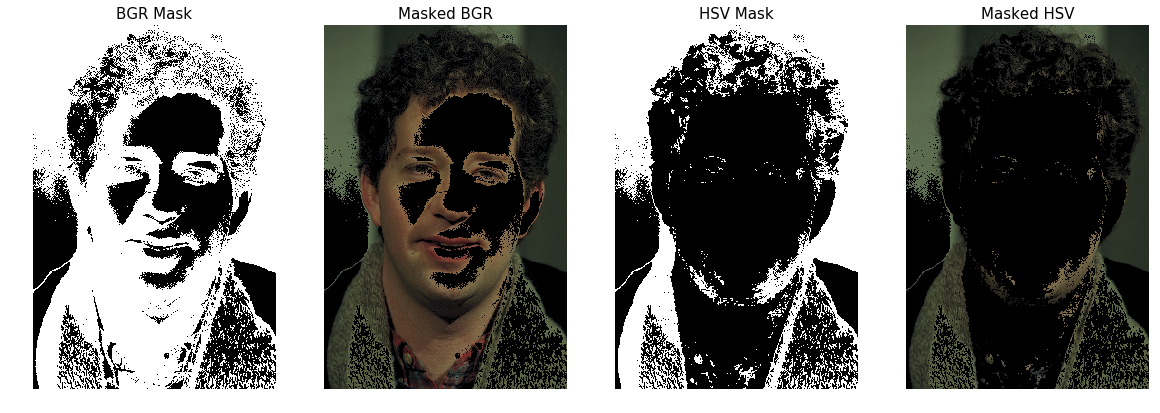

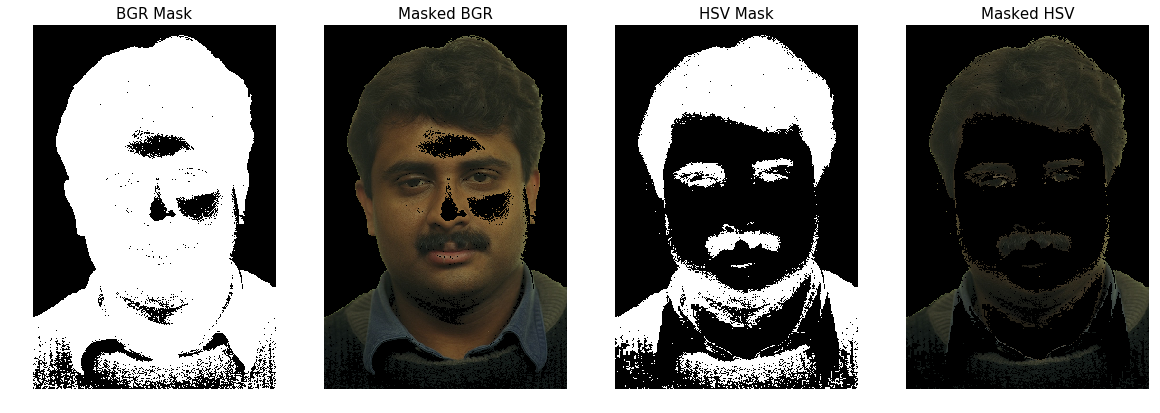

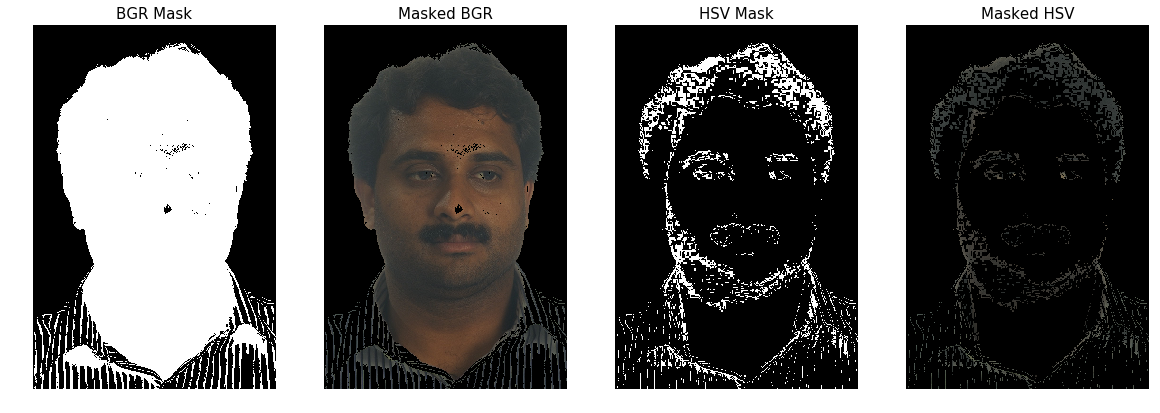

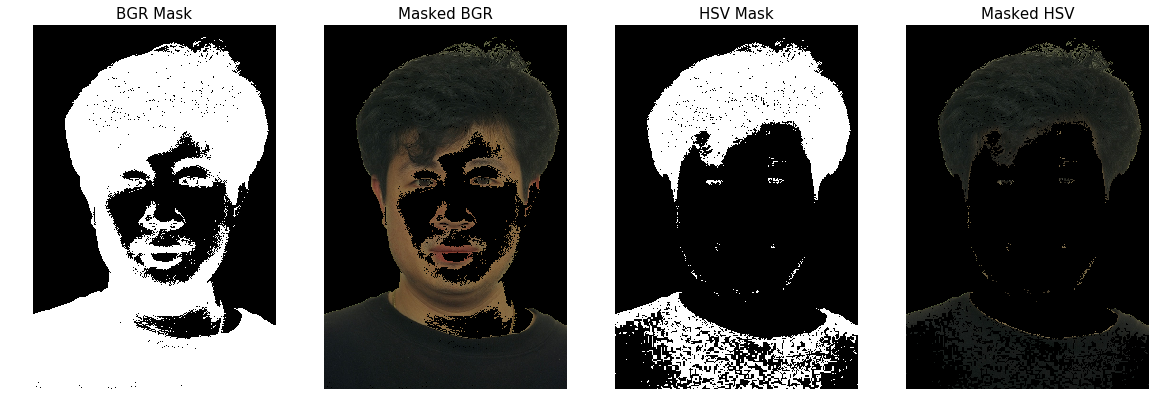

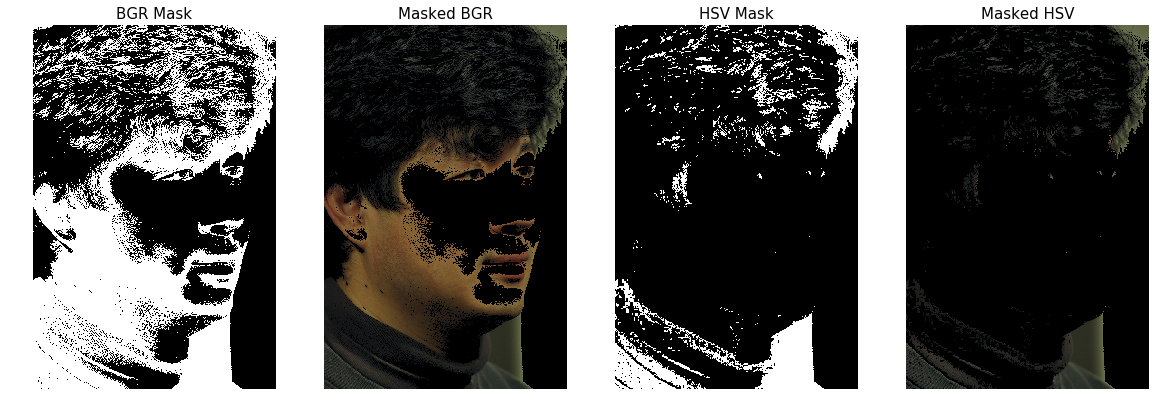

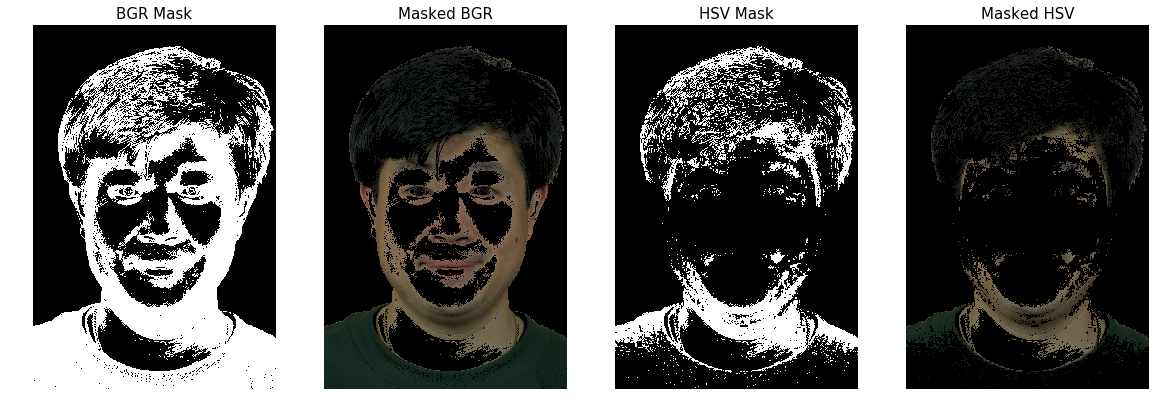

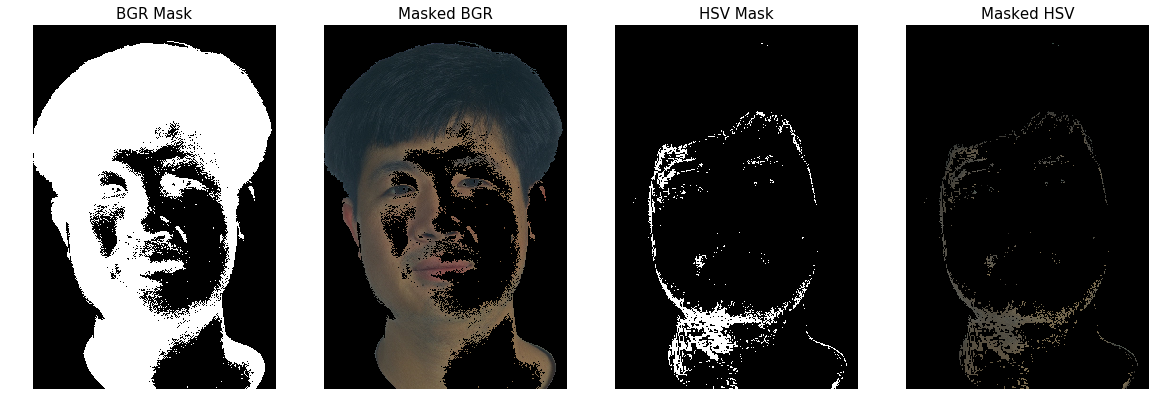

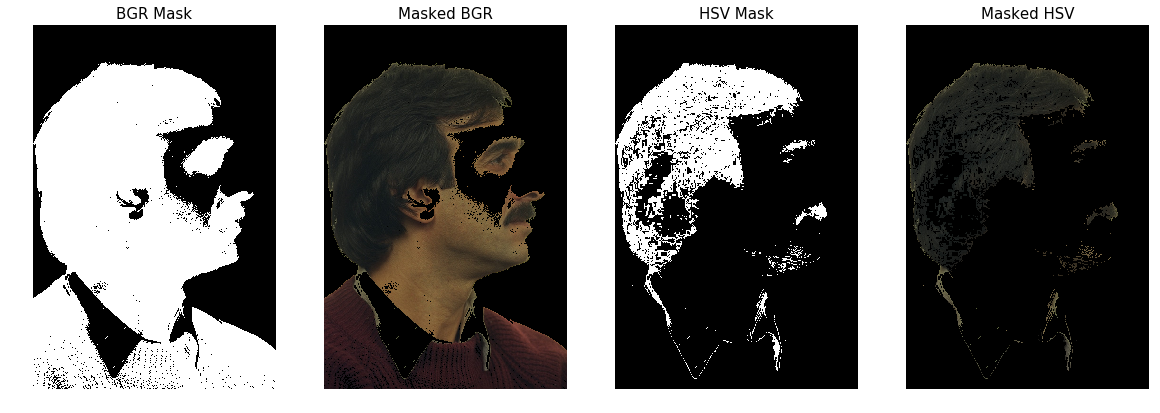

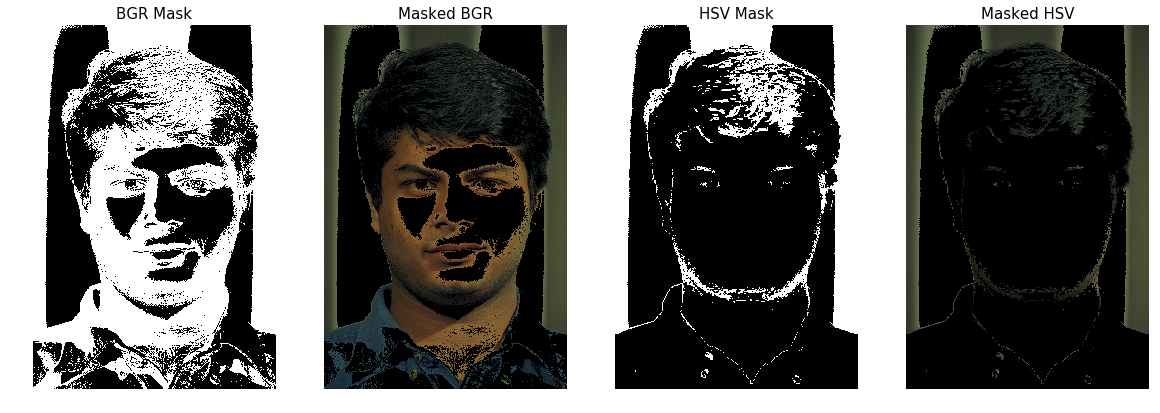

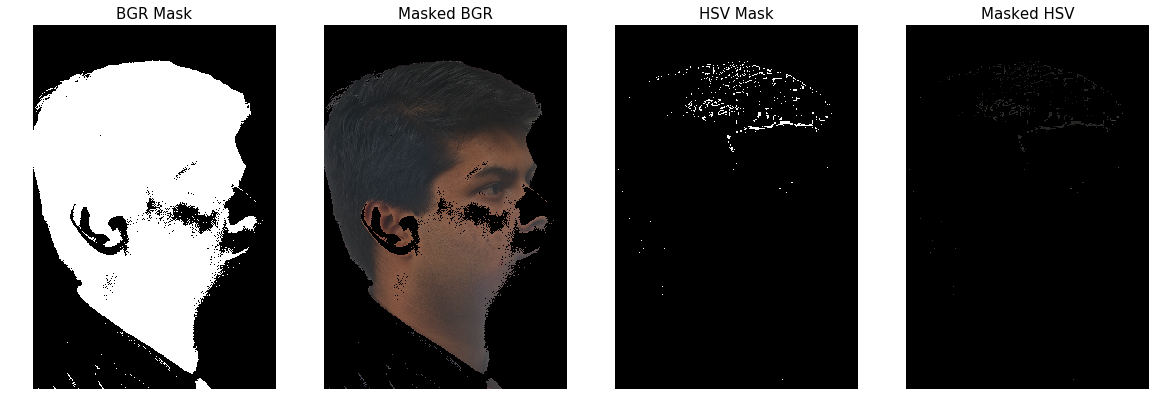

In [3]:
bgr_centroids=[]
hsv_centroids=[]
original_images=glob.glob("Images/Original Images/img_01*.jpg")+glob.glob("Images/Original Images/img_020.jpg")
original_images.sort()
for img_path in original_images:
    bgr_img=cv2.imread(img_path)
    
    
    bgr_centroids.append(get_max_crowded_centroid_value(bgr_img))
    hsv_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)
    hsv_centroids.append(get_max_crowded_centroid_value(bgr_img))
    
    
max_bgr_skin_range=np.max(bgr_centroids,axis=0).astype(np.uint8)
min_bgr_skin_range=np.min(bgr_centroids,axis=0).astype(np.uint8)
max_hsv_skin_range=np.max(hsv_centroids,axis=0).astype(np.uint8)
min_hsv_skin_range=np.min(hsv_centroids,axis=0).astype(np.uint8)

mask_by_range_and_plot(max_bgr_skin_range,min_bgr_skin_range,max_hsv_skin_range,min_hsv_skin_range)
